## Installing required libraries

In [ ]:
!pip install numpy panda matplotlib scikit-learn seaborn


## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn import datasets

bcancer = datasets.load_breast_cancer()

X = bcancer.data
y = bcancer.target

feature_names = bcancer.feature_names



# print(X)   # Data
# print(y)  # Classes
print(len(X))
print(feature_names)


569
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
print(df.shape)


(569, 31)


In [5]:
from sklearn.model_selection import train_test_split


# Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)




## Tring different values for k

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Try different k values (my best are 6 % 7)

knn = KNeighborsClassifier(n_neighbors = 11) 

knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=11)

In [38]:
knn.score(X_test, y_test)


0.9824561403508771

In [39]:
import os
import joblib

# Directory to save models
model_dir = 'bcancer_models/'
os.makedirs(model_dir, exist_ok=True)  # Ensure the directory exists

# Save the KNN model
knn_model_path = os.path.join(model_dir, 'KNN.joblib')
joblib.dump(knn, knn_model_path)
print(f"KNN model saved to {knn_model_path}")


KNN model saved to bcancer_models/KNN.joblib


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

y_pred = knn.predict(X_test)

# Evaluating model

print("KNN Results\n")

print("Accuracy", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


KNN Results

Accuracy 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Recall: 0.9824561403508771
Precision: 0.9829367940398942
F1 Score: 0.9823691172375383


In [43]:
# Print class names
class_names = bcancer.target_names
print("Class names:", class_names)


Class names: ['malignant' 'benign']


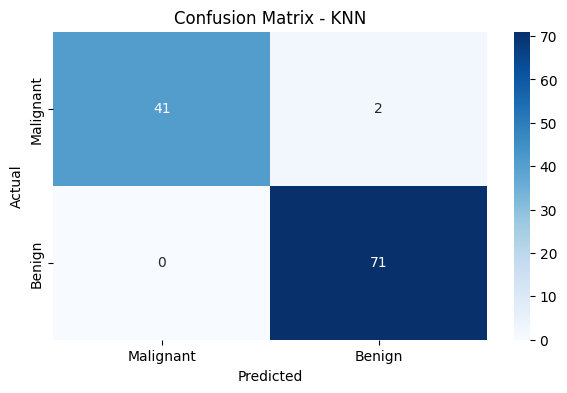

In [42]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

class_names = ['Malignant', 'Benign']

plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()


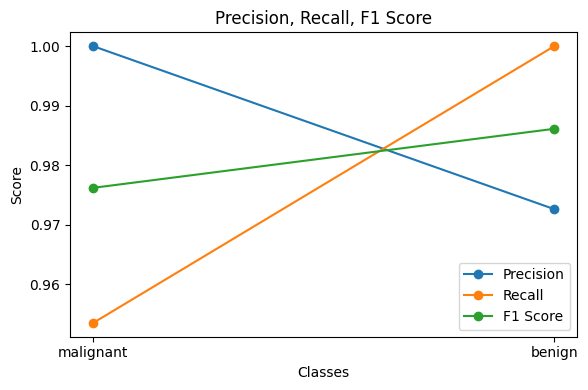

In [44]:
plt.figure(figsize=(6, 4))

metrics = [precision, recall, f1]
metric_names = ['Precision', 'Recall', 'F1 Score']

for i, metric in enumerate(metrics):
    plt.plot(range(len(class_names)), metric, marker='o', label=metric_names[i])

plt.xticks(ticks=range(len(class_names)), labels=class_names)
plt.xlabel('Classes')
plt.ylabel('Score')
plt.title('Precision, Recall, F1 Score')
plt.legend()
plt.tight_layout()

plt.show()


## Using Different Machine Learning Classification Models

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors = 11),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier(),
    'MLP': MLPClassifier(),
    'SGD': SGDClassifier()
}


results = {}
best_model_name = None
best_model_accuracy = 0

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results[name] = {
        'y_pred': y_pred,
        'accuracy': accuracy_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'f1_score': f1_score(y_test, y_pred, average='weighted')
    }
    print(f"\n{name} Results")
    accuracy = results[name]['accuracy']
    print("Accuracy:", results[name]['accuracy'])
    # print("Confusion Matrix:\n", results[name]['confusion_matrix'])
    print("Classification Report:\n", results[name]['classification_report'])
    print("Recall:", results[name]['recall'])
    print("Precision:", results[name]['precision'])
    print("F1 Score:", results[name]['f1_score'])
    
    # Check if this is the best model so far
    if accuracy > best_model_accuracy:
        best_model_accuracy = accuracy
        best_model_name = name
        
# Print the best model
print(f"\nBest Model: {best_model_name} with accuracy {best_model_accuracy:.2f}")
   



KNN Results
Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Recall: 0.9824561403508771
Precision: 0.9829367940398942
F1 Score: 0.9823691172375383

SVM Results
Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Recall: 0.9473684210526315
Precision: 0.9514695830485304
F1 Score: 0.9464615931721194


c:\Users\hasee\anaconda3\envs\py311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Results
Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Recall: 0.956140350877193
Precision: 0.9569049312470365
F1 Score: 0.9558014271241044

Random Forest Results
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Recall: 0.9649122807017544
Precision: 0.9652053622194477
F1 Score: 0.9647382344750765

MLP Results
Accur

In [48]:
import joblib

# Directory to save models
model_dir = 'bcancer_models/'

# Ensure the directory exists
import os
os.makedirs(model_dir, exist_ok=True)

# Save each classifier model
for name, clf in classifiers.items():
    model_path = os.path.join(model_dir, f'{name}.joblib')
    joblib.dump(clf, model_path)
    print(f"Model {name} saved to {model_path}")


Model KNN saved to bcancer_models/KNN.joblib
Model SVM saved to bcancer_models/SVM.joblib
Model Logistic Regression saved to bcancer_models/Logistic Regression.joblib
Model Random Forest saved to bcancer_models/Random Forest.joblib
Model MLP saved to bcancer_models/MLP.joblib
Model SGD saved to bcancer_models/SGD.joblib


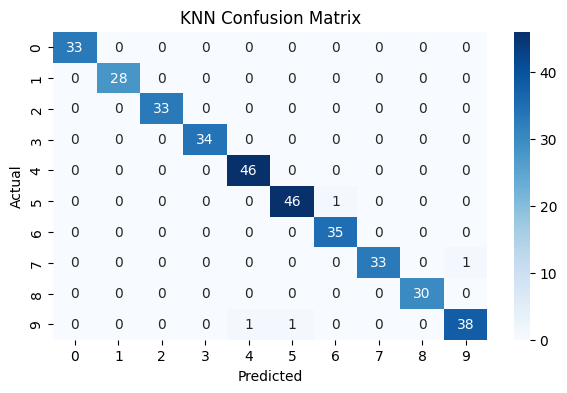

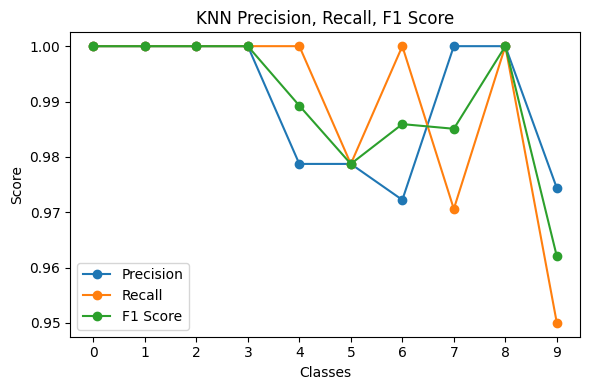

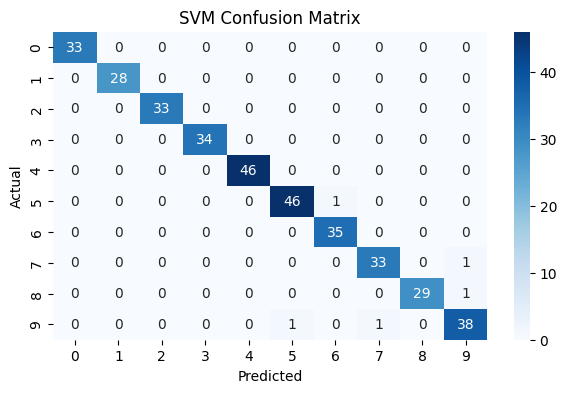

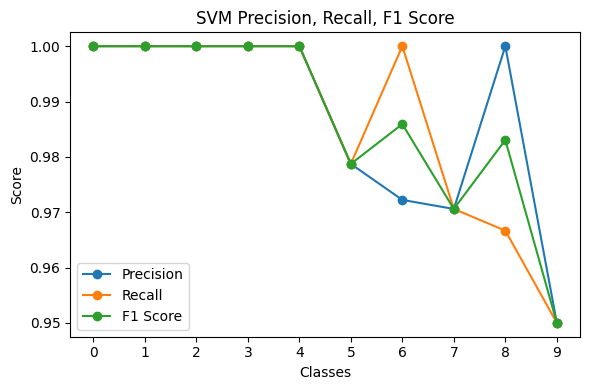

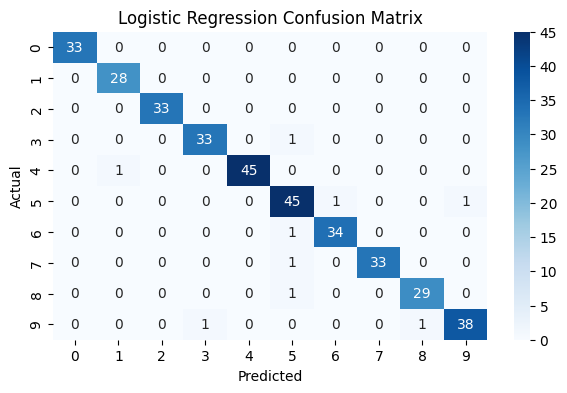

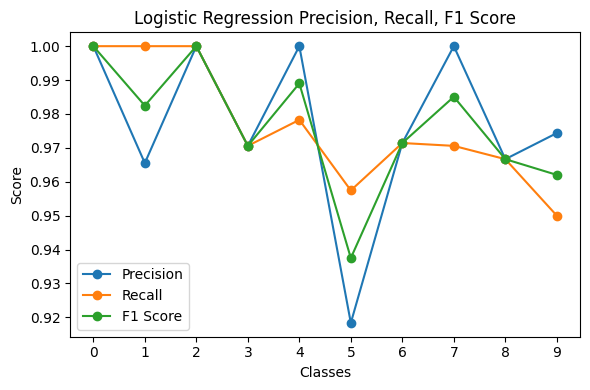

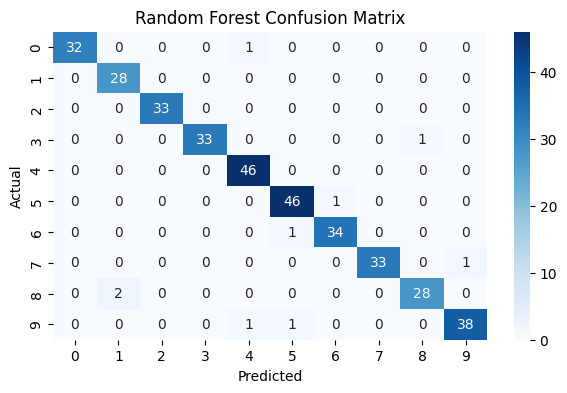

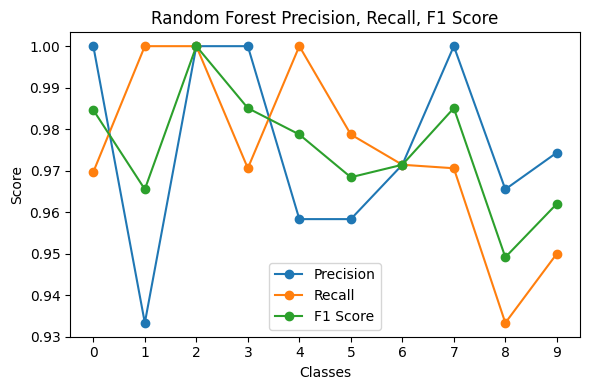

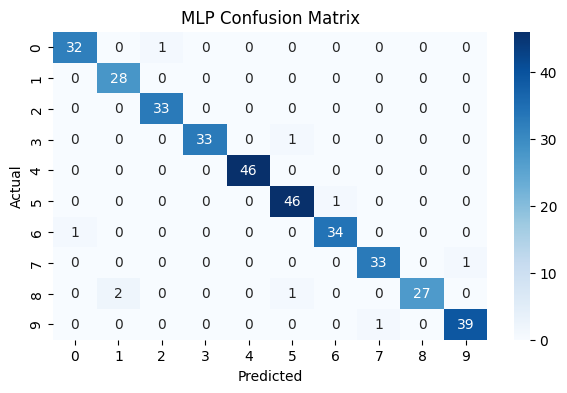

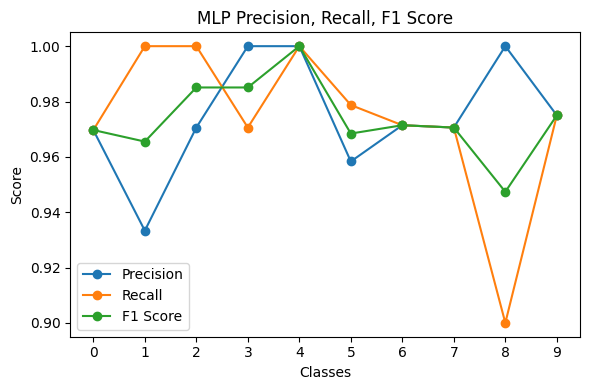

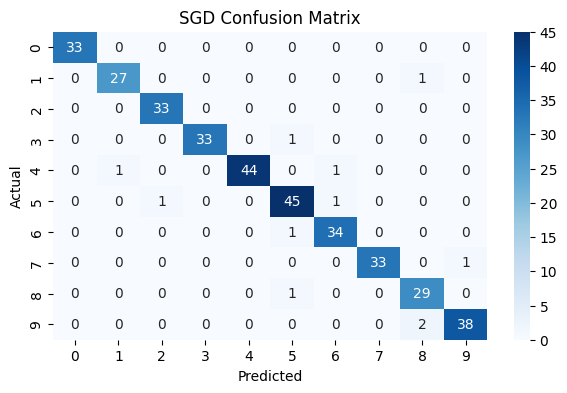

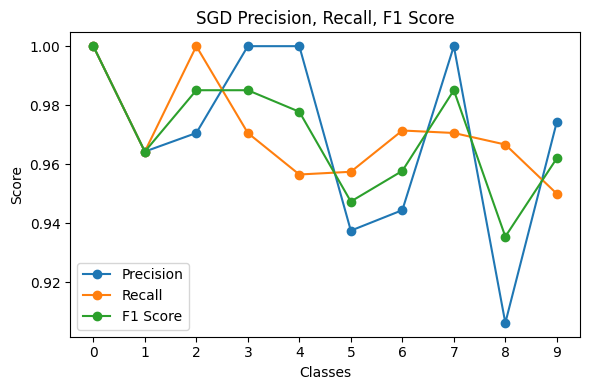

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, class_names, title):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Function to plot precision, recall, and F1-score
def plot_metrics(y_test, y_pred, class_names, title):
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)

    metrics = [precision, recall, f1]
    metric_names = ['Precision', 'Recall', 'F1 Score']

    plt.figure(figsize=(6, 4))

    for i, metric in enumerate(metrics):
        plt.plot(range(len(class_names)), metric, marker='o', label=metric_names[i])

    plt.xticks(ticks=range(len(class_names)), labels=class_names)
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Class names for Iris dataset
class_names = ['Malignant', 'Benign']

# Plotting the results for each classifier
for name, result in results.items():
    y_pred = result['y_pred']
    plot_confusion_matrix(y_test, y_pred, class_names, f'{name} Confusion Matrix')
    plot_metrics(y_test, y_pred, class_names, f'{name} Precision, Recall, F1 Score')
